In [1]:
# python version 3.10.7
# scikit-learn == 1.1.2
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

# load datasets

In [31]:
df = pd.read_csv(r"..\data_files\ecq_rank_0_or_1_cond_limit_5000_one_per_isog_class_balanced.csv")
print(f"We are using {len(df.columns)} a_p's for this dataset.")

# create a normalize df: df_norm where 
# df_norm[p] = df[p]/sqrt(p)
# df_norm = df.copy()
cols = df.columns[:-1]
for p in cols:
    df[p] = (df[p]) / np.sqrt(int(p))

We are using 201 a_p's for this dataset.


# create train and test data

In [32]:
from sklearn.model_selection import train_test_split
# create train and test sets from df
# shuffle=False
# default test_size=0.25
X = df.drop(columns=['rank']).values
y = df['rank'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

# create train and test sets from df_norm
# shuffle=False
# default test_size=0.25
X_norm = df_norm.drop(columns=['rank']).values
y_norm = df_norm['rank'].values
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, shuffle=False)

# models

In [6]:
# available models: SVM, Random Forest, Logistic Regression
models = {'SVM' : [SVC, {'kernel' : 'linear'}],
          'Random Forest' : [RandomForestClassifier, {'n_estimators' : 100}], 
          'Logistic Regression' : [LogisticRegression, {'max_iter' : 3000}]
          }

In [5]:
# create a df to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy on train set', 'MCC on test set', 'Accuracy on train set (Normalized)', 'MCC on test set (Normalized)'])

for model_name in models:
    # create a model
    params = models[model_name][1]
    model = models[model_name][0]
    clf = model(**params)
    
    # train a svm model for X_train and y_train
    clf.fit(X_train, y_train)
    # show the accuracy of the model on the train data
    y_train_pred = clf.predict(X_train)
    train_accuracy = clf.score(X_train, y_train)
    # show the MCC of the model on the test data
    y_test_pred = clf.predict(X_test)
    test_mcc_score = matthews_corrcoef(y_test, y_test_pred)
    # print(f"For NON-NORMALZED dateset: Accuracy on train set: {clf.score(X_train, y_train)}. MCC on test set: {test_mcc_score}")

    # --------------------------------------------
    # train a svm model for X_train_norm and y_train_norm
    clf.fit(X_train_norm, y_train_norm)
    # show the accuracy of the model on the train data
    norm_y_train_pred = clf.predict(X_train_norm)
    norm_train_accuracy = clf.score(X_train_norm, y_train_norm)
    # show the MCC of the model on the train and data
    norm_y_test_pred = clf.predict(X_test_norm)
    norm_test_mcc_score = matthews_corrcoef(y_test_norm, norm_y_test_pred)
    # print(f"For NORMALZED dateset: Accuracy on train set: {clf.score(X_train_norm, y_train_norm)}. MCC on test set: {norm_test_mcc_score}")

    # --------------------------------------------
    # store the results in the results df
    results = results.append({'Model': model_name, 
                              'Accuracy on train set': train_accuracy, 
                              'MCC on test set': test_mcc_score,
                              'Accuracy on train set (Normalized)': norm_train_accuracy, 
                              'MCC on test set (Normalized)': norm_test_mcc_score}, 
                              ignore_index=True)
    

C:\Users\Xiaoyu Huang\AppData\Local\Temp\ipykernel_15516\2561516631.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users\Xiaoyu Huang\AppData\Local\Temp\ipykernel_15516\2561516631.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
C:\Users\Xiaoyu Huang\AppData\Local\Temp\ipykernel_15516\2561516631.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


# results

In [6]:
results

,Model,Accuracy on train set,MCC on test set,Accuracy on train set (Normalized),MCC on test set (Normalized)
0,SVM,1.0,0.992883,1.0,0.992908
1,Random Forest,1.0,0.843438,1.0,0.818511
2,Logistic Regression,1.0,0.992908,1.0,0.989380


In [33]:
# demo using SVM model
model_name = 'Logistic Regression'

# create a model
clf = models[model_name][0]()
# train a svm model for X_train and y_train
clf.fit(X_train, y_train)
# show the accuracy of the model on the train and data
y_test_pred = clf.predict(X_test)
test_mcc_score = matthews_corrcoef(y_test, y_test_pred)
print(f"For NON-NORMALZED dateset: Accuracy on train set: {clf.score(X_train, y_train)}. MCC on test set: {test_mcc_score}")

# --------------------------------------------
# train a svm model for X_train_norm and y_train_norm
clf.fit(X_train_norm, y_train_norm)
# show the accuracy of the model on the train and data
norm_y_test_pred = clf.predict(X_test_norm)
norm_test_mcc_score = matthews_corrcoef(y_test_norm, norm_y_test_pred)
print(f"For NORMALZED dateset: Accuracy on train set: {clf.score(X_train_norm, y_train_norm)}. MCC on test set: {norm_test_mcc_score}")

For NON-NORMALZED dateset: Accuracy on train set: 1.0. MCC on test set: 0.9893802299604636
For NORMALZED dateset: Accuracy on train set: 1.0. MCC on test set: 0.9893802299604636


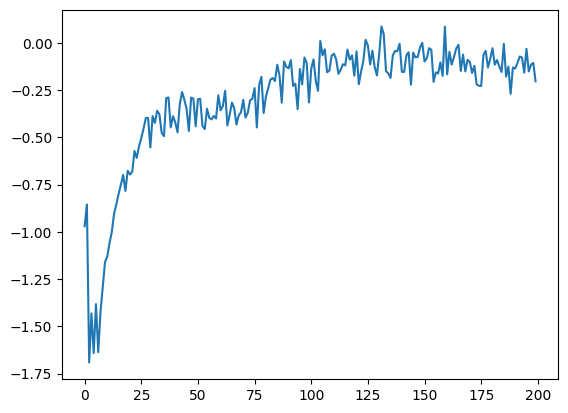

In [34]:
# plot the coefficients of the model
from matplotlib import pyplot as plt
plt.plot(clf.coef_[0])

In [35]:
df.describe()

,2,3,5,7,11,13,17,19,23,29,...,1163,1171,1181,1187,1193,1201,1213,1217,1223,rank
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,...,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,-0.001573,-0.019519,-0.045756,-0.066581,-0.084632,-0.105487,-0.076062,-0.116953,-0.067897,-0.074922,...,0.016514,-0.023685,0.000181,0.021575,-0.006105,-0.027456,-0.024114,-0.016092,0.016803,0.500000
std,0.641779,0.735381,0.851004,0.902038,0.945321,0.948790,0.960023,0.962776,0.972341,0.989122,...,1.002931,0.995012,1.008928,0.978461,1.002608,0.998541,1.002873,0.991724,1.001806,0.500111
min,-1.414214,-1.732051,-1.788854,-1.889822,-1.809068,-1.941451,-1.940285,-1.835326,-1.876630,-1.856953,...,-1.993972,-1.987149,-1.978718,-1.973711,-1.997694,-1.962174,-1.981156,-1.977898,-1.973040,0.000000
25%,-0.707107,-0.577350,-0.447214,-0.755929,-0.904534,-0.832050,-0.727607,-0.917663,-0.834058,-0.928477,...,-0.791724,-0.818238,-0.872964,-0.754654,-0.810658,-0.865665,-0.861372,-0.859955,-0.743464,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.277350,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.029223,0.000000,0.000000,0.000000,0.057711,-0.057425,0.000000,0.000000,0.500000
75%,0.707107,0.577350,0.447214,0.377964,0.603023,0.554700,0.485071,0.458831,0.625543,0.742781,...,0.821047,0.730570,0.872964,0.812705,0.781706,0.750243,0.782413,0.802625,0.829249,1.000000
max,1.414214,1.732051,1.788854,1.889822,1.809068,1.941451,1.940285,1.835326,1.876630,1.856953,...,1.993972,1.987149,1.978718,1.973711,1.910837,1.962174,1.981156,1.949232,1.973040,1.000000
